# Exploratory Data Analysis (EDA) Of Retail Dataset

In [1]:
# For starters we import the important libraries that would aid in the process
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading in the dataframe
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data insights

In [3]:
df.shape

(9994, 13)

- Data comprisies of 9994 observations and 13 characteristics 12 of which are candidates to be features and one dependent variable (profit) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- On inspection, data has no null or missing values

In [6]:
df.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


- The statistics shown for the postal code are not helpful
- There is a big difference between the 75% percintile and the max values of sales and profit which is an indicator of there being outliers

In [7]:
# Know the postal code is not really important here so we remove this column
df.drop(['Postal Code'],axis=1, inplace=True)

In [8]:
# checking for duplicates
df.duplicated().sum()

50

In [9]:
# droping duplicates to allow for more 
df.drop_duplicates(inplace=True);
df.shape

(9944, 12)

### EDA Visualization

#### Checking for correlation (numeric data)

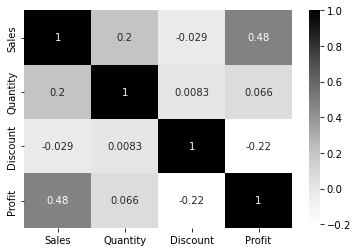

In [10]:
sns.heatmap(df.corr(),cmap='Greys',annot=True);

In [11]:
# data type separation (numeric and non numeric)
df_object = df.select_dtypes(include="object")
df_num = df.select_dtypes(exclude="object")

In [12]:
# instance of labelencoder
enc = LabelEncoder()

In [13]:
for i in range(0, df_object.shape[1]):
    df_object.iloc[:,i] = enc.fit_transform( df_object.iloc[:,i]);
    

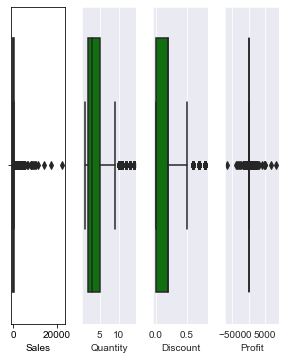

In [14]:
l = df_num.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(12,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(df_num[l[i]],color='green', orient='v')
    plt.tight_layout()

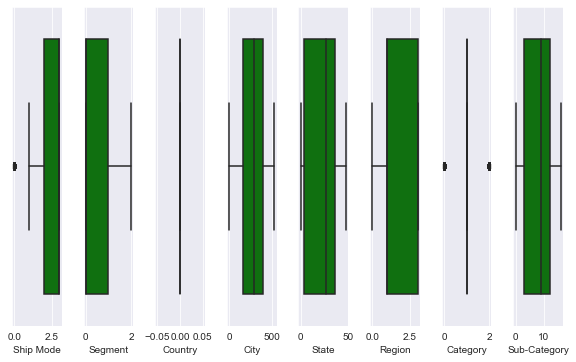

In [15]:
l = df_object.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(12,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(df_object[l[i]],color='green', orient='v')
    plt.tight_layout()

In the previous 6 cells:
- The data was separated to numeric and non-numeric
- Using lable encoder, the non numeric data was turned to numeric 
- A box whisker plot was made for the two new df
- The outliers shown in the describtive statistics part can be seen in the sales and profit plots
- It can also be seen that USA is the only country in the data set (single line)


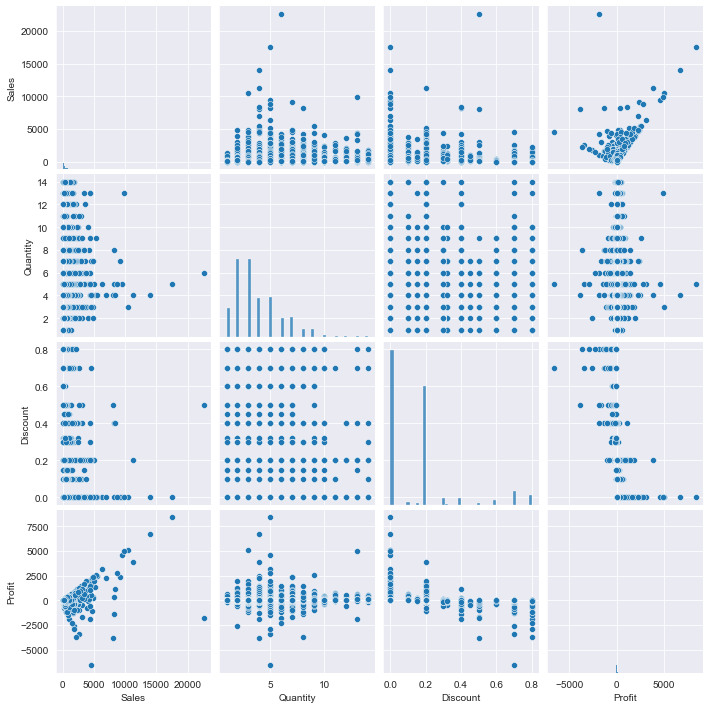

In [16]:
# Visualizing the data set numeric pairs using pair plot
sns.pairplot(df);

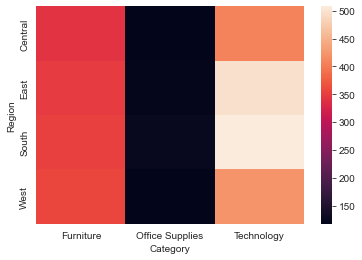

In [50]:
df_piv = df.pivot_table( index='Region', columns='Category', values='Sales')
sns.heatmap(df_piv, cbar = True);

- It can be seen that highest sales are generated in the south and east regions by the thecnology category

In [42]:
df[df["Region"] == "Central"].groupby("Category").mean()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,340.431654,3.800000,0.298000,-6.054472
Office Supplies,117.951071,3.809187,0.252155,6.269090
Technology,405.753124,3.676190,0.133095,80.231981


In [40]:
df.shape

(9944, 12)